In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dft = pd.read_excel("HM3 4_26.xlsx", sheet_name="AATS spread sheet")
dft.replace('.', np.nan, inplace=True)
# globally set plot fonts to times new roman
plt.rcParams["font.family"] = "Times New Roman"

In [72]:
from openpyxl import load_workbook

# Replace 'file.xlsx' with the path to your Excel file
wb = load_workbook('HM3 4_26.xlsx')

# Get the sheet names
sheet_names = wb.sheetnames
sheet_names

['Sheet4', 'AATS spread sheet', 'MR reduction ', 'Sheet1']

In [73]:
# Define the mapping of old column names to new column names
dft.columns = dft.columns.str.strip().str.title().str.replace('_', ' ')

column_mapping = {
    'Male/Female': 'Sex',
    'Male/female': 'Sex',
    'Postoperative Mr Reduction':'Postoperative MR Reduction',
    'Bmi': 'BMI',
    'Bsa': 'BSA',
    'Preoprhc Ramean':'Preop RHC RA Mean',
    'Preoprhc Pamean': 'Preop RHC Pa Mean',
    'Preop Rhc  Pasystolic': 'Preop RHC Pa Systolic',
    'Preoprhc Padiastolic':'Preop RHC Pa Diastolic',
    'Preoprhc Pcwp': 'Preop RHC PCWP',
    'Preoprhc Rappcwp Ratio':'Preop RHC RAP/PCWP Ratio',
    'Preoprhc Pvr': 'Preop RHC PVR',
    'Preoprhc Tpg': 'Preop RHC TPG',
    'Preoperative Inotrope Mcs': 'Preoperative Inotrope MCS',
    'Preop Mcs Ecmo': 'Preop MCS ECMO',
    'Preop Mcs Iabp': 'Preop MCS IABP',
    'Preop Mcs Rvad': 'Preop MCS RVAD',
    'Preop Mcs Temporary Lvad (Impella)': 'Preop MCS Temporary LVAD (Impella)',
    'Btt,Dt,Btd':'BTT/DT',
    'Cpb Time Minutes':'CPB Time (Minutes)',
    'Concomitant Procedures At Time Of Lvad': 'Concomitant Procedures At Time Of LVAD',
    'Preopecho Date':'Preop Echo Date',
    'Preopecho Mr': 'Preop Echo MR',
    'Preopecho Tr': 'Preop Echo TR',
    'Preopecho Tvannulus': 'Preop Echo TV Annulus',
    'Preopecho Tvannulus Indexed': 'Preop Echo TV Annulus Indexed',
    'Preopecho Raenlargement': 'Preop Echo RA Enlargement',
    'Preopecho Rvdysfunction': 'Preop Echo RV Dysfunction',
    'Preopecho Tapse': 'Preop Echo TAPSE',
    'Preopecho Rvedd': 'Preop Echo RVEDD',
    'Preopecho Rvedd Indexed': 'Preop Echo RVEDD Indexed',
    'Postopecho1 Date': 'Postop Echo-1 Date',
    'Postopecho1 Dayspostop': 'Postop Echo-1 Days Postop',
    'Postopecho1 Echo Mr': 'Postop Echo-1 Echo MR',
    'Postopecho1 Tr': 'Postop Echo-1 TR',
    'Postopecho1 Rvdysfunction': 'Postop Echo-1 RV Dysfunction',
    'Postopecho1 Tapse': 'Postop Echo-1 TAPSE',
    'Postopecho1 Rvedd': 'Postop Echo-1 RVEDD',
    'Postopecho1 Rvedd Indexed': 'Postop Echo-1 RVEDD Indexed',
    'Postopecho2 Date': 'Postop Echo-2 Date',
    'Postopecho2 Dayspostop': 'Postop Echo-2 Days Postop',
    'Postopecho2 Echo Mr': 'Postop Echo-2 Echo MR',
    'Postopecho2 Tr': 'Postop Echo-2 TR',
    'Postopecho2 Rvdysfunction': 'Postop Echo-2 RV Dysfunction',
    'Postopecho2 Tapse': 'Postop Echo-2 TAPSE',
    'Postopecho2 Rvedd': 'Postop Echo-2 RVEDD',
    'Postopecho2 Rvedd Indexed': 'Postop Echo-2 RVEDD Indexed',
    'Postopecho3 Date': 'Postop Echo-3 Date',
    'Postopecho3 Dayspostop': 'Postop Echo-3 Days Postop',
    'Postopecho3 Echo Mr': 'Postop Echo-3 Echo MR',
    'Postopecho3 Tr': 'Postop Echo-3 TR',
    'Postopecho3 Rvdysfunction': 'Postop Echo-3 RV Dysfunction',
    'Postopecho3 Tapse': 'Postop Echo-3 TAPSE',
    'Postopecho3 Rvedd': 'Postop Echo-3 RVEDD',
    'Postopecho3 Rvedd Indexed': 'Postop Echo-3 RVEDD Indexed',
    'Postopecho4 Date': 'Postop Echo-4 Date',
    'Postopecho4 Dayspostop': 'Postop Echo-4 Days Postop',
    'Postopecho4 Echo Mr': 'Postop Echo-4 Echo MR',
    'Postopecho4 Tr': 'Postop Echo-4 TR',
    'Postopecho4 Rvdysfunction': 'Postop Echo-4 RV Dysfunction',
    'Postopecho4 Tapse': 'Postop Echo-4 TAPSE',
    'Postopecho4 Rvedd': 'Postop Echo-4 RVEDD',
    'Postopecho4 Rvedd Indexed': 'Postop Echo-4 RVEDD Indexed',
    'Postopecho5 Date': 'Postop Echo-5 Date',
    'Postopecho5 Dayspostop': 'Postop Echo-5 Days Postop',
    'Postopecho5 Echo Mr': 'Postop Echo-5 Echo MR',
    'Postopecho5 Tr': 'Postop Echo-5 TR',
    'Postopecho5 Rvdysfunction': 'Postop Echo-5 RV Dysfunction',
    'Postopecho5 Tapse': 'Postop Echo-5 TAPSE',
    'Postopecho5 Rvedd': 'Postop Echo-5 RVEDD',
    'Postopecho5 Rvedd Indexed': 'Postop Echo-5 RVEDD Indexed',
    'Postopecho6 Date': 'Postop Echo-6 Date',
    'Postopecho6 Dayspostop': 'Postop Echo-6 Days Postop',
    'Postopecho6 Echo Mr': 'Postop Echo-6 Echo MR',
    'Postopecho6 Tr': 'Postop Echo-6 TR',
    'Postopecho6 Rvdysfunction': 'Postop Echo-6 RV Dysfunction',
    'Postopecho6 Tapse': 'Postop Echo-6 TAPSE',
    'Postopecho6 Rvedd': 'Postop Echo-6 RVEDD',
    'Postopecho6 Rvedd Indexed': 'Postop Echo-6 RVEDD Indexed',
    'Rhc1 Date': 'RHC-1 Date',
    'Rhc1 Dayspostop': 'RHC-1 Days Postop',
    'Rhc1 Rapressure': 'RHC-1 RA Pressure',
    'Rhc1 Pamean': 'RHC-1 Pa Mean',
    'Rhc1 Pasystolic': 'RHC-1 Pa Systolic',
    'Rhc1 Padiastolic': 'RHC-1 Pa Diastolic',
    'Rhc1 Papi': 'RHC-1 PAPi', #pulmonary artery pulsatility index
    'Rhc1 Pcwp': 'RHC-1 PCWP',
    'Rhc1 Rappcwp Ratio': 'RHC-1 RAP/PCWP Ratio', #right atrial pressure/pulmonary capillary wedge pressure
    'Rhc1 Co': 'RHC-1 CO', #cardiac output
    'Rhc1 Ci': 'RHC-1 CI', #cardiac index
    'Rhc1 Pvr': 'RHC-1 PVR',
    'Rhc2 Date': 'RHC-2 Date',
    'Rhc2 Dayspostop': 'RHC-2 Days Postop',
    'Rhc2 Rapressure': 'RHC-2 RA Pressure',
    'Rhc2 Mpap': 'RHC-2 MPAP',
    'Rhc2 Pasystolic': 'RHC-2 Pa Systolic',
    'Rhc2 Padiastolic': 'RHC-2 Pa Diastolic',
    'Rhc2 Papi': 'RHC-2 PAPi',
    'Rhc2 Pcwp': 'RHC-2 PCWP',
    'Rhc2 Rappcwp Ratio': 'RHC-2 RAP/PCWP Ratio',
    'Rhc2 Co': 'RHC-2 CO',
    'Rhc2 Ci': 'RHC-2 CI',
    'Rhc2 Pvr': 'RHC-2 PVR',
    'Postop Rvad': 'Postop RVAD',
    'Rvad Insertion At Time Of Lvad Placement': 'RVAD Insertion At Time Of LVAD Placement', #ventricular assist device
    'Cr At Discharge': 'CR At Discharge',
    'Cr At Discharge >2X Preop Baseline': 'CR At Discharge >2X Preop Baseline',
    'Tbili > 2 At Discharge': 'TBili > 2 At Discharge', #TOTAL BILIRUBIN?
    'Ast/Alt >2X Upper Limits Of Normal At Discharge': 'AST/ALT >2X Upper Limits Of Normal At Discharge',
    'Crrt/Dialysis Initiated During Index Hospitalization': 'CRRT/Dialysis Initiated During Index Hospitalization',
    'Crrt/Dialysis Initiated After Discharge': 'CRRT/Dialysis Initiated After Discharge',
    'Los': 'LOS',
    'Date Of First Hf Readmission': 'Date Of First HF Readmission',
    'Number Of Hf Hospitalizations Within 90 Days': 'Number Of HF Hospitalizations Within 90 Days',
    'Number Of Hf Hospitalizations Total Since Index Operation':'Number Of HF Hospitalizations Total Since Index Operation'
}

# Rename the columns in the DataFrame
dft = dft.rename(columns=column_mapping)



In [74]:
# Replace 1.5 and 2.5 with 2 in TR columns:
columns_to_replace = ['Preop Echo TR', 'Postop Echo-1 TR', 'Postop Echo-2 TR','Postop Echo-3 TR','Postop Echo-4 TR','Postop Echo-5 TR','Postop Echo-6 TR',
                     ['Preop Echo RV Dysfunction','Postop Echo-1 RV Dysfunction','Postop Echo-2 RV Dysfunction','Postop Echo-3 RV Dysfunction',
                      'Postop Echo-4 RV Dysfunction','Postop Echo-5 RV Dysfunction','Postop Echo-6 RV Dysfunction']]  # Add more columns as needed

for col in columns_to_replace:
    dft[col] = dft[col].replace(2.5, 3)
    dft[col] = dft[col].replace(1.5,2)

In [75]:
def create_group(row):
    if row['Postoperative MR Reduction'] <= 1.5:
        return 'Group 1'
    elif row['Postoperative MR Reduction'] > 1.5:
        return 'Group 2'
    else:
        return None
    
dft['Group Number'] = dft.apply(create_group, axis=1)

In [76]:
group1_df = dft[dft['Group Number'] == 'Group 1'].copy()
group2_df = dft[dft['Group Number'] == 'Group 2'].copy()

# Functions

In [77]:
# to get avg, std, n for TAPSE
def calculate_stats_tapse(df_choice_s_vs_ns, start_range, end_range, average_var_name, std_var_name, pop_size_var_name):
    # Create a temporary DataFrame to perform the operations
    temp_df = df_choice_s_vs_ns.copy()

    for i in range(1, 7):
        # Set values to np.nan in the temporary DataFrame
        temp_df.loc[(temp_df[f'Postop Echo-{i} Days Postop'] < start_range) |
                    (temp_df[f'Postop Echo-{i} Days Postop'] >= end_range), 
                    f'Postop Echo-{i} TAPSE'] = np.nan

    # Calculate average of PostopECHO[1-6]_ECHO_MR
    df_choice_s_vs_ns['Average Postop TAPSE'] = temp_df[[f'Postop Echo-{i} TAPSE' for i in range(1, 7)]].mean(axis=1)

    # Calculate the mean, std, and count based on the input values
    globals()[average_var_name] = round(df_choice_s_vs_ns['Average Postop TAPSE'].mean(), 2)
    globals()[std_var_name] = round(df_choice_s_vs_ns['Average Postop TAPSE'].std(), 2)
    globals()[pop_size_var_name] = df_choice_s_vs_ns['Average Postop TAPSE'].notnull().sum()

In [78]:
def calculate_stats_rvedd(df, start_range, end_range, average_var_name, std_var_name, pop_size_var_name):
    # Create a temporary DataFrame to perform the operations
    temp_df = df.copy()

    for i in range(1, 7):
        # Set values to np.nan in the temporary DataFrame
        temp_df.loc[(temp_df[f'Postop Echo-{i} Days Postop'] < start_range) |
                    (temp_df[f'Postop Echo-{i} Days Postop'] >= end_range), 
                    f'Postop Echo-{i} RVEDD'] = np.nan

    # Calculate average 1-6
    df['Average Postop RVEDD'] = temp_df[[f'Postop Echo-{i} RVEDD' for i in range(1, 7)]].mean(axis=1)

    # Get mathematical figures
    globals()[average_var_name] = round(df['Average Postop RVEDD'].mean(), 2)
    globals()[std_var_name] = round(df['Average Postop RVEDD'].std(), 2)
    globals()[pop_size_var_name] = df['Average Postop RVEDD'].notnull().sum()


In [79]:
def calculate_stats_rvdy(df, start_range, end_range, average_var_name, std_var_name, pop_size_var_name):
    # Create a temporary DataFrame to perform the operations
    temp_df = df.copy()

    for i in range(1, 7):
        # Set values to np.nan in the temporary DataFrame
        temp_df.loc[(temp_df[f'Postop Echo-{i} Days Postop'] < start_range) |
                    (temp_df[f'Postop Echo-{i} Days Postop'] >= end_range), 
                    f'Postop Echo-{i} RV Dysfunction'] = np.nan

    # Calculate average 1-6
    df['Average Postop RV Dysfunction'] = temp_df[[f'Postop Echo-{i} RV Dysfunction' for i in range(1, 7)]].mean(axis=1)

    # Get mathematical figures
    globals()[average_var_name] = round(df['Average Postop RV Dysfunction'].mean(), 2)
    globals()[std_var_name] = round(df['Average Postop RV Dysfunction'].std(), 2)
    globals()[pop_size_var_name] = df['Average Postop RV Dysfunction'].notnull().sum()


# Tapse

In [140]:
tapse_pre_avg1 = round(group1_df['Preop Echo TAPSE'].mean(),2)
tapse_pre_std1 = round(group1_df['Preop Echo TAPSE'].std(),2)
tapse_pre_n1 = group1_df['Preop Echo TAPSE'].notnull().sum()

tapse_pre_avg2 = round(group2_df['Preop Echo TAPSE'].mean(),2)
tapse_pre_std2 = round(group2_df['Preop Echo TAPSE'].std(),2)
tapse_pre_n2 = group2_df['Preop Echo TAPSE'].notnull().sum()

## Tapse pre P

In [141]:
g1_pretapse = group1_df['Preop Echo TAPSE'].dropna().values
g2_pretapse = group2_df['Preop Echo TAPSE'].dropna().values
g_both_pretapse = np.concatenate([g1_pretapse, g2_pretapse], axis=0)
print(g1_pretapse.shape, g2_pretapse.shape)

(32,) (26,)


In [142]:
def get_mock_diff():
    ixs = np.arange(58)
    np.random.shuffle(ixs)
    return g_both_pretapse[ixs][:32].mean() - g_both_pretapse[ixs][32:].mean()
mocks_pretapse  = np.array([get_mock_diff() for _ in range(1000)])

true_mean_pre_tapse = np.abs(g2_pretapse.mean() - g1_pretapse.mean())
tapse_pre_p=((true_mean_pre_tapse <= np.abs(mocks_pretapse) ).sum()+1)/len(mocks_pretapse)
tapse_pre_p

0.608

## Tapse post P

In [143]:
calculate_stats_tapse(group1_df, 7, 30, 'tapse_post_avg1', 'tapse_post_std1', 'tapse_post_n1')
calculate_stats_tapse(group2_df, 7, 30, 'tapse_post_avg2', 'tapse_post_std2', 'tapse_post_n2')

In [144]:
g1posttapse = group1_df['Average Postop TAPSE'].dropna().values
g2posttapse = group2_df['Average Postop TAPSE'].dropna().values

In [145]:
# create 10k mock means
g_bothposttapse = np.concatenate([g1posttapse, g2posttapse], axis=0)

In [146]:
def get_mock_diff():
    ixs = np.arange(30)
    np.random.shuffle(ixs)
    return g_bothposttapse[ixs][:13].mean() - g_bothposttapse[ixs][13:].mean()

In [147]:
mocksposttapse  = np.array([get_mock_diff() for _ in range(1000)])

In [148]:
true_mean_post_tapse = np.abs(g2posttapse.mean() - g1posttapse.mean())
tapse_post_p=((true_mean_post_tapse <= np.abs(mocksposttapse) ).sum()+1)/len(mocksposttapse)
tapse_post_p

0.426

## Tapse 1 yr P

In [149]:
calculate_stats_tapse(group1_df, 30, 365, 'tapse_1yr_avg1', 'tapse_1yr_std1', 'tapse_1yr_n1')
calculate_stats_tapse(group2_df, 30, 365, 'tapse_1yr_avg2', 'tapse_1yr_std2', 'tapse_1yr_n2')

In [150]:
g1_1yrtapse = group1_df['Average Postop TAPSE'].dropna().values
g2_1yrtapse = group2_df['Average Postop TAPSE'].dropna().values
g_both_1yrtapse = np.concatenate([g1_1yrtapse, g2_1yrtapse], axis=0)

In [151]:
def get_mock_diff():
    ixs = np.arange(47)
    np.random.shuffle(ixs)
    return g_both_1yrtapse[ixs][:27].mean() - g_both_1yrtapse[ixs][27:].mean()
mocks_1yrtapse  = np.array([get_mock_diff() for _ in range(1000)])

true_mean_1yr_tapse = np.abs(g2_1yrtapse.mean() - g1_1yrtapse.mean())
tapse_1yr_p=((true_mean_1yr_tapse <= np.abs(mocks_1yrtapse) ).sum()+1)/len(mocks_1yrtapse)
tapse_1yr_p

0.03

## Tapse 2 yr P

In [152]:
calculate_stats_tapse(group1_df, 365, 730, 'tapse_2yr_avg1', 'tapse_2yr_std1', 'tapse_2yr_n1')
calculate_stats_tapse(group2_df, 365, 730, 'tapse_2yr_avg2', 'tapse_2yr_std2', 'tapse_2yr_n2')

In [153]:
g1_2yrtapse = group1_df['Average Postop TAPSE'].dropna().values
g2_2yrtapse = group2_df['Average Postop TAPSE'].dropna().values
g_both_2yrtapse = np.concatenate([g1_2yrtapse, g2_2yrtapse], axis=0)
print(g1_2yrtapse.shape, g2_2yrtapse.shape)

(16,) (9,)


In [154]:
def get_mock_diff():
    ixs = np.arange(25)
    np.random.shuffle(ixs)
    return g_both_2yrtapse[ixs][:16].mean() - g_both_2yrtapse[ixs][16:].mean()
mocks_2yrtapse  = np.array([get_mock_diff() for _ in range(1000)])

true_mean_2yr_tapse = np.abs(g2_2yrtapse.mean() - g1_2yrtapse.mean())
tapse_2yr_p=((true_mean_2yr_tapse <= np.abs(mocks_2yrtapse) ).sum()+1)/len(mocks_2yrtapse)
tapse_2yr_p

0.819

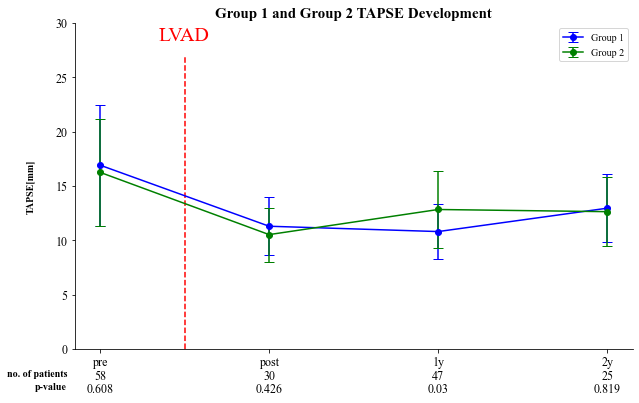

In [158]:
# Define the time steps and corresponding averages and standard deviations for both groups
time_steps = ['pre\n{}\n{}'.format(tapse_pre_n1+tapse_pre_n2,tapse_pre_p), 
              'post\n{}\n{}'.format(tapse_post_n1+tapse_post_n2,tapse_post_p), 
              '1y\n{}\n{}'.format(tapse_1yr_n1+tapse_1yr_n2, tapse_1yr_p),
              '2y\n{}\n{}'.format(tapse_2yr_n1+tapse_2yr_n2,tapse_2yr_p)]
averages_group1 = [tapse_pre_avg1, tapse_post_avg1, tapse_1yr_avg1, tapse_2yr_avg1]
stds_group1 = [tapse_pre_std1, tapse_post_std1, tapse_1yr_std1, tapse_2yr_std1]
averages_group2 = [tapse_pre_avg2, tapse_post_avg2, tapse_1yr_avg2, tapse_2yr_avg2]
stds_group2 = [tapse_pre_std2, tapse_post_std2, tapse_1yr_std2, tapse_2yr_std2]


# Plot the line graph with error bars for both groups on the same plot
fig, ax = plt.subplots(figsize=(10, 6))  # Increase the figure size
ax.errorbar(time_steps, averages_group1, yerr=stds_group1, fmt='-o', capsize=5, label='Group 1', color='blue')
ax.errorbar(time_steps, averages_group2, yerr=stds_group2, fmt='-o', capsize=5, label='Group 2', color='green')

ax.set_ylabel('TAPSE[mm]', fontweight='bold', labelpad=20)
ax.set_title('Group 1 and Group 2 TAPSE Development', fontweight='bold', fontsize=15)
ax.tick_params(axis='x', labelsize=12)  # Increase the font size of x-axis labels
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase the font size of y-axis labels
ax.set_yticks(range(0, 31, 5))  # Set y-axis range from 0 to 30 with step size 5
ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine

# Add 'no. of patients' to the left of the first x-axis label
ax.text(-.37, -2.3, 'no. of patients', rotation=0, va='center', ha='center', fontweight='bold')
ax.text(-.29, -3.5, 'p-value', rotation=0, va='center', ha='center', fontweight='bold')

# Add a vertical dotted red line between 'pre' and 'post' and label it with 'LVAD' on the top
ax.axvline(x=.5, color='red', linestyle='--', ymax=0.90) 
ax.text(.5, 28, 'LVAD', va='bottom', ha='center', color='red', fontsize=20)

# Add legend
ax.legend()

plt.savefig('line_tapse.pdf')

plt.show()
tapsecombo = ax.get_figure()

# RVEDD

In [122]:
rvedd_pre_avg = round(group1_df['Preop Echo RVEDD'].mean(),2)
rvedd_pre_std = round(group1_df['Preop Echo RVEDD'].std(),2)
rvedd_pre_n = group1_df['Preop Echo RVEDD'].notnull().sum() 

rvedd_pre_avg2 = round(group2_df['Preop Echo RVEDD'].mean(),2)
rvedd_pre_std2 = round(group2_df['Preop Echo RVEDD'].std(),2)
rvedd_pre_n2 = group2_df['Preop Echo RVEDD'].notnull().sum() 

## RVEDD Pre P

In [123]:
g1_prervedd = group1_df['Preop Echo RVEDD'].dropna().values
g2_prervedd = group2_df['Preop Echo RVEDD'].dropna().values
g_both_prervedd = np.concatenate([g1_prervedd, g2_prervedd], axis=0)
print(g1_prervedd.shape, g2_prervedd.shape)

(30,) (25,)


In [124]:
def get_mock_diff():
    ixs = np.arange(55)
    np.random.shuffle(ixs)
    return g_both_prervedd[ixs][:30].mean() - g_both_prervedd[ixs][30:].mean()
mocks_prervedd  = np.array([get_mock_diff() for _ in range(1000)])

true_mean_pre_rvedd = np.abs(g2_prervedd.mean() - g1_prervedd.mean())
rvedd_pre_p=((true_mean_pre_rvedd <= np.abs(mocks_prervedd) ).sum()+1)/len(mocks_prervedd)
rvedd_pre_p

0.057

## RVEDD Post P

In [125]:
calculate_stats_rvedd(group2_df, 7, 30, 'rvedd_post_avg2', 'rvedd_post_std2', 'rvedd_post_n2')
calculate_stats_rvedd(group1_df, 7, 30, 'rvedd_post_avg', 'rvedd_post_std', 'rvedd_post_n')

In [126]:
g1_postrvedd = group1_df['Average Postop RVEDD'].dropna().values
g2_postrvedd = group2_df['Average Postop RVEDD'].dropna().values
g_both_postrvedd = np.concatenate([g1_postrvedd, g2_postrvedd], axis=0)
print(g1_postrvedd.shape, g2_postrvedd.shape)

(9,) (13,)


In [127]:
def get_mock_diff():
    ixs = np.arange(22)
    np.random.shuffle(ixs)
    return g_both_postrvedd[ixs][:9].mean() - g_both_postrvedd[ixs][9:].mean()
mocks_postrvedd  = np.array([get_mock_diff() for _ in range(1000)])

true_mean_post_rvedd = np.abs(g2_postrvedd.mean() - g1_postrvedd.mean())
rvedd_post_p=((true_mean_post_rvedd <= np.abs(mocks_postrvedd) ).sum()+1)/len(mocks_postrvedd)
rvedd_post_p

0.137

## RVEDD 1yr P

In [128]:
calculate_stats_rvedd(group2_df, 30, 365, 'rvedd_1yr_avg2', 'rvedd_1yr_std2', 'rvedd_1yr_n2')
calculate_stats_rvedd(group1_df, 30, 365, 'rvedd_1yr_avg', 'rvedd_1yr_std', 'rvedd_1yr_n')

In [129]:
g1_1yrrvedd = group1_df['Average Postop RVEDD'].dropna().values
g2_1yrrvedd = group2_df['Average Postop RVEDD'].dropna().values
g_both_1yrrvedd = np.concatenate([g1_1yrrvedd, g2_1yrrvedd], axis=0)
print(g1_1yrrvedd.shape, g2_1yrrvedd.shape)

(21,) (14,)


In [130]:
def get_mock_diff():
    ixs = np.arange(30)
    np.random.shuffle(ixs)
    return g_both_1yrrvedd[ixs][:13].mean() - g_both_1yrrvedd[ixs][13:].mean()
mocks_1yrrvedd  = np.array([get_mock_diff() for _ in range(1000)])

true_mean_1yr_rvedd = np.abs(g2_1yrrvedd.mean() - g1_1yrrvedd.mean())
rvedd_1yr_p=((true_mean_1yr_rvedd <= np.abs(mocks_1yrrvedd) ).sum()+1)/len(mocks_1yrrvedd)
rvedd_1yr_p

0.564

## RVEDD 2yr P

In [131]:
calculate_stats_rvedd(group2_df, 365, 730, 'rvedd_2yr_avg2', 'rvedd_2yr_std2', 'rvedd_2yr_n2')
calculate_stats_rvedd(group1_df, 365, 730, 'rvedd_2yr_avg', 'rvedd_2yr_std', 'rvedd_2yr_n')

In [132]:
g1_2yrrvedd = group1_df['Average Postop RVEDD'].dropna().values
g2_2yrrvedd = group2_df['Average Postop RVEDD'].dropna().values
g_both_2yrrvedd = np.concatenate([g1_2yrrvedd, g2_2yrrvedd], axis=0)
print(g1_2yrrvedd.shape, g2_2yrrvedd.shape)

(9,) (8,)


In [133]:
def get_mock_diff():
    ixs = np.arange(17)
    np.random.shuffle(ixs)
    return g_both_2yrrvedd[ixs][:9].mean() - g_both_2yrrvedd[ixs][9:].mean()
mocks_2yrrvedd  = np.array([get_mock_diff() for _ in range(1000)])

true_mean_2yr_rvedd = np.abs(g2_2yrrvedd.mean() - g1_2yrrvedd.mean())
rvedd_2yr_p=((true_mean_2yr_rvedd <= np.abs(mocks_2yrrvedd) ).sum()+1)/len(mocks_2yrrvedd)
rvedd_2yr_p

0.229

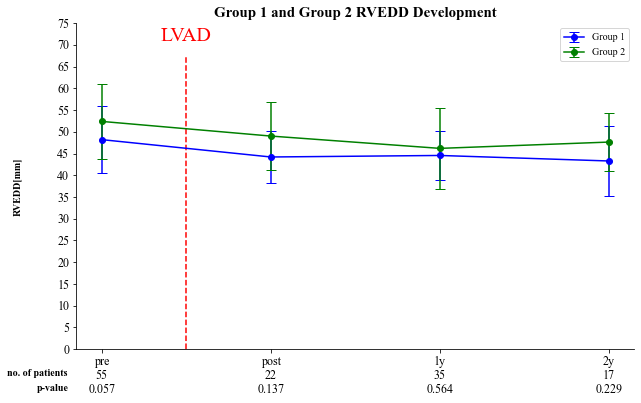

In [160]:
# Define the time steps and corresponding averages and standard deviations for both groups
time_steps = ['pre\n{}\n{}'.format(rvedd_pre_n+rvedd_pre_n2,rvedd_pre_p), 
              'post\n{}\n{}'.format(rvedd_post_n+rvedd_post_n2,rvedd_post_p), 
              '1y\n{}\n{}'.format(rvedd_1yr_n+rvedd_1yr_n2,rvedd_1yr_p), 
              '2y\n{}\n{}'.format(rvedd_2yr_n+rvedd_2yr_n2,rvedd_2yr_p)]
averages_group1 = [rvedd_pre_avg, rvedd_post_avg, rvedd_1yr_avg, rvedd_2yr_avg]
stds_group1 = [rvedd_pre_std, rvedd_post_std, rvedd_1yr_std, rvedd_2yr_std]
averages_group2 = [rvedd_pre_avg2, rvedd_post_avg2, rvedd_1yr_avg2, rvedd_2yr_avg2]
stds_group2 = [rvedd_pre_std2, rvedd_post_std2, rvedd_1yr_std2, rvedd_2yr_std2]

# Plot the line graph with error bars for both groups on the same plot
fig, ax = plt.subplots(figsize=(10, 6))  # Increase the figure size
ax.errorbar(time_steps, averages_group1, yerr=stds_group1, fmt='-o', capsize=5, label='Group 1', color='blue')
ax.errorbar(time_steps, averages_group2, yerr=stds_group2, fmt='-o', capsize=5, label='Group 2', color='green')

ax.set_ylabel('RVEDD[mm]', fontweight='bold', labelpad=35)
ax.set_title('Group 1 and Group 2 RVEDD Development', fontweight='bold', fontsize=15)
ax.tick_params(axis='x', labelsize=12)  # Increase the font size of x-axis labels
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase the font size of y-axis labels
ax.set_yticks(range(0, 80, 5))  # Set y-axis range from 0 to 30 with step size 5
ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine

# Add 'no. of patients' to the left of the first x-axis label
ax.text(-.38, -5.6, 'no. of patients', rotation=0, va='center', ha='center', fontweight='bold')
ax.text(-.29, -8.9, 'p-value', rotation=0, va='center', ha='center', fontweight='bold')

# Add a vertical dotted red line between 'pre' and 'post' and label it with 'LVAD' on the top
ax.axvline(x=.5, color='red', linestyle='--', ymax=0.90) 
ax.text(.5, 70, 'LVAD', va='bottom', ha='center', color='red', fontsize=20)

# Add legend
ax.legend()

plt.savefig('line_rvedd.pdf')
plt.show()
rveddcombo = ax.get_figure()

# RV Dysfunction

In [80]:
rvdy_pre_avg = round(group1_df['Preop Echo RV Dysfunction'].mean(),2)
rvdy_pre_std = round(group1_df['Preop Echo RV Dysfunction'].std(),2)
rvdy_pre_n = group1_df['Preop Echo RV Dysfunction'].notnull().sum() 

rvdy_pre_avg2 = round(group2_df['Preop Echo RV Dysfunction'].mean(),2)
rvdy_pre_std2 = round(group2_df['Preop Echo RV Dysfunction'].std(),2)
rvdy_pre_n2 = group2_df['Preop Echo RV Dysfunction'].notnull().sum() 

## RV Dys Pre P

In [81]:
g1_prervdy = group1_df['Preop Echo RV Dysfunction'].dropna().values
g2_prervdy = group2_df['Preop Echo RV Dysfunction'].dropna().values
g_both_prervdy = np.concatenate([g1_prervdy, g2_prervdy], axis=0)
print(g1_prervdy.shape, g2_prervdy.shape)

(35,) (30,)


In [82]:
def get_mock_diff():
    ixs = np.arange(65)
    np.random.shuffle(ixs)
    return g_both_prervdy[ixs][:35].mean() - g_both_prervdy[ixs][35:].mean()
mocks_prervdy  = np.array([get_mock_diff() for _ in range(1000)])

true_mean_pre_rvdy = np.abs(g2_prervdy.mean() - g1_prervdy.mean())
rvdy_pre_p=((true_mean_pre_rvdy <= np.abs(mocks_prervdy) ).sum()+1)/len(mocks_prervdy)
rvdy_pre_p

0.165

## RV Dys Post P

In [83]:
calculate_stats_rvdy(group1_df, 7, 30, 'rvdy_post_avg', 'rvdy_post_std', 'rvdy_post_n')
calculate_stats_rvdy(group2_df, 7, 30, 'rvdy_post_avg2', 'rvdy_post_std2', 'rvdy_post_n2')

In [84]:
g1_postrvdy = group1_df['Average Postop RV Dysfunction'].dropna().values
g2_postrvdy = group2_df['Average Postop RV Dysfunction'].dropna().values
g_both_postrvdy = np.concatenate([g1_postrvdy, g2_postrvdy], axis=0)
print(g1_postrvdy.shape, g2_postrvdy.shape)

(13,) (20,)


In [85]:
def get_mock_diff():
    ixs = np.arange(32)
    np.random.shuffle(ixs)
    return g_both_postrvdy[ixs][:13].mean() - g_both_postrvdy[ixs][13:].mean()
mocks_postrvdy  = np.array([get_mock_diff() for _ in range(1000)])

true_mean_post_rvdy = np.abs(g2_postrvdy.mean() - g1_postrvdy.mean())
rvdy_post_p=((true_mean_post_rvdy <= np.abs(mocks_postrvdy) ).sum()+1)/len(mocks_postrvdy)
rvdy_post_p

0.911

## RV Dys 1yr P

In [86]:
calculate_stats_rvdy(group1_df, 30, 365, 'rvdy_1yr_avg', 'rvdy_1yr_std', 'rvdy_1yr_n')
calculate_stats_rvdy(group2_df, 30, 365, 'rvdy_1yr_avg2', 'rvdy_1yr_std2', 'rvdy_1yr_n2')

In [87]:
g1_1yrrvdy = group1_df['Average Postop RV Dysfunction'].dropna().values
g2_1yrrvdy = group2_df['Average Postop RV Dysfunction'].dropna().values
g_both_1yrrvdy = np.concatenate([g1_1yrrvdy, g2_1yrrvdy], axis=0)
print(g1_1yrrvdy.shape, g2_1yrrvdy.shape)

(30,) (21,)


In [88]:
def get_mock_diff():
    ixs = np.arange(51)
    np.random.shuffle(ixs)
    return g_both_1yrrvdy[ixs][:30].mean() - g_both_1yrrvdy[ixs][30:].mean()
mocks_1yrrvdy  = np.array([get_mock_diff() for _ in range(1000)])

true_mean_1yr_rvdy = np.abs(g2_1yrrvdy.mean() - g1_1yrrvdy.mean())
rvdy_1yr_p=((true_mean_1yr_rvdy <= np.abs(mocks_1yrrvdy) ).sum()+1)/len(mocks_1yrrvdy)
rvdy_1yr_p

0.079

## RV Dys 2yr P

In [89]:
calculate_stats_rvdy(group1_df, 365, 730, 'rvdy_2yr_avg', 'rvdy_2yr_std', 'rvdy_2yr_n')
calculate_stats_rvdy(group2_df, 365, 730, 'rvdy_2yr_avg2', 'rvdy_2yr_std2', 'rvdy_2yr_n2')

In [90]:
g1_2yrrvdy = group1_df['Average Postop RV Dysfunction'].dropna().values
g2_2yrrvdy = group2_df['Average Postop RV Dysfunction'].dropna().values
g_both_2yrrvdy = np.concatenate([g1_2yrrvdy, g2_2yrrvdy], axis=0)
print(g1_2yrrvdy.shape, g2_2yrrvdy.shape)

(18,) (12,)


In [91]:
def get_mock_diff():
    ixs = np.arange(30)
    np.random.shuffle(ixs)
    return g_both_2yrrvdy[ixs][:18].mean() - g_both_2yrrvdy[ixs][18:].mean()
mocks_2yrrvdy  = np.array([get_mock_diff() for _ in range(1000)])

true_mean_2yr_rvdy = np.abs(g2_2yrrvdy.mean() - g1_2yrrvdy.mean())
rvdy_2yr_p=((true_mean_2yr_rvdy <= np.abs(mocks_2yrrvdy) ).sum()+1)/len(mocks_2yrrvdy)
rvdy_2yr_p

0.331

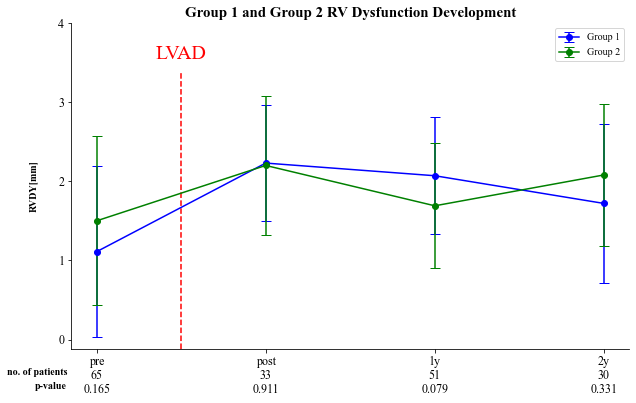

In [120]:
# Define the time steps and corresponding averages and standard deviations for both groups
time_steps = ['pre\n{}\n{}'.format(rvdy_pre_n+rvdy_pre_n2,rvdy_pre_p), 
              'post\n{}\n{}'.format(rvdy_post_n+rvdy_post_n2,rvdy_post_p), 
              '1y\n{}\n{}'.format(rvdy_1yr_n+rvdy_1yr_n2,rvdy_1yr_p), 
              '2y\n{}\n{}'.format(rvdy_2yr_n+rvdy_2yr_n2,rvdy_2yr_p)]
averages_group1 = [rvdy_pre_avg, rvdy_post_avg, rvdy_1yr_avg, rvdy_2yr_avg]
stds_group1 = [rvdy_pre_std, rvdy_post_std, rvdy_1yr_std, rvdy_2yr_std]
averages_group2 = [rvdy_pre_avg2, rvdy_post_avg2, rvdy_1yr_avg2, rvdy_2yr_avg2]
stds_group2 = [rvdy_pre_std2, rvdy_post_std2, rvdy_1yr_std2, rvdy_2yr_std2]

# Plot the line graph with error bars for both groups on the same plot
fig, ax = plt.subplots(figsize=(10, 6))  # Increase the figure size
ax.errorbar(time_steps, averages_group1, yerr=stds_group1, fmt='-o', capsize=5, label='Group 1', color='blue')
ax.errorbar(time_steps, averages_group2, yerr=stds_group2, fmt='-o', capsize=5, label='Group 2', color='green')

ax.set_ylabel('RVDY[mm]', fontweight='bold', labelpad=20)
ax.set_title('Group 1 and Group 2 RV Dysfunction Development', fontweight='bold', fontsize=15)
ax.tick_params(axis='x', labelsize=12)  # Increase the font size of x-axis labels
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase the font size of y-axis labels
ax.set_yticks(np.arange(0, 4.1, 1))  # Set y-axis range from 0 to 30 with step size 5
ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine

# Add 'no. of patients' to the left of the first x-axis label
ax.text(-.35, -.42, 'no. of patients', rotation=0, va='center', ha='center', fontweight='bold')
ax.text(-.27, -.59, 'p-value', rotation=0, va='center', ha='center', fontweight='bold')

# Add a vertical dotted red line between 'pre' and 'post' and label it with 'LVAD' on the top
ax.axvline(x=.5, color='red', linestyle='--', ymax=0.85) 
ax.text(.5,3.5, 'LVAD', va='bottom', ha='center', color='red', fontsize=20)

# Add legend
ax.legend(loc='upper right')

plt.savefig('line_rvdy.pdf')
plt.show()
rvdycombo = ax.get_figure()

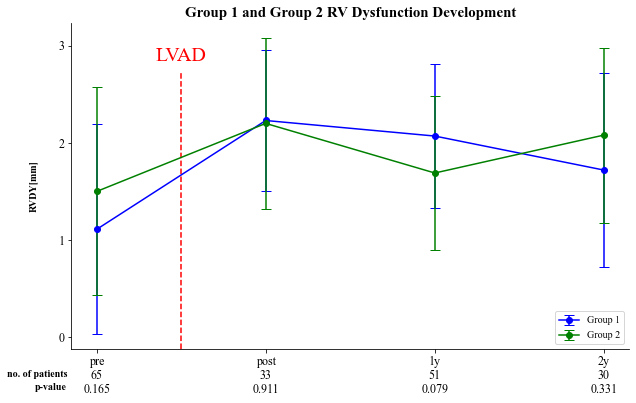

In [121]:
# Define the time steps and corresponding averages and standard deviations for both groups
time_steps = ['pre\n{}\n{}'.format(rvdy_pre_n+rvdy_pre_n2,rvdy_pre_p), 
              'post\n{}\n{}'.format(rvdy_post_n+rvdy_post_n2,rvdy_post_p), 
              '1y\n{}\n{}'.format(rvdy_1yr_n+rvdy_1yr_n2,rvdy_1yr_p), 
              '2y\n{}\n{}'.format(rvdy_2yr_n+rvdy_2yr_n2,rvdy_2yr_p)]
averages_group1 = [rvdy_pre_avg, rvdy_post_avg, rvdy_1yr_avg, rvdy_2yr_avg]
stds_group1 = [rvdy_pre_std, rvdy_post_std, rvdy_1yr_std, rvdy_2yr_std]
averages_group2 = [rvdy_pre_avg2, rvdy_post_avg2, rvdy_1yr_avg2, rvdy_2yr_avg2]
stds_group2 = [rvdy_pre_std2, rvdy_post_std2, rvdy_1yr_std2, rvdy_2yr_std2]

# Plot the line graph with error bars for both groups on the same plot
fig, ax = plt.subplots(figsize=(10, 6))  # Increase the figure size
ax.errorbar(time_steps, averages_group1, yerr=stds_group1, fmt='-o', capsize=5, label='Group 1', color='blue')
ax.errorbar(time_steps, averages_group2, yerr=stds_group2, fmt='-o', capsize=5, label='Group 2', color='green')

ax.set_ylabel('RVDY[mm]', fontweight='bold', labelpad=20)
ax.set_title('Group 1 and Group 2 RV Dysfunction Development', fontweight='bold', fontsize=15)
ax.tick_params(axis='x', labelsize=12)  # Increase the font size of x-axis labels
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase the font size of y-axis labels
ax.set_yticks(np.arange(0, 4, 1))  # Set y-axis range from 0 to 30 with step size 5
ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine

# Add 'no. of patients' to the left of the first x-axis label
ax.text(-.35, -.38, 'no. of patients', rotation=0, va='center', ha='center', fontweight='bold')
ax.text(-.27, -.51, 'p-value', rotation=0, va='center', ha='center', fontweight='bold')

# Add a vertical dotted red line between 'pre' and 'post' and label it with 'LVAD' on the top
ax.axvline(x=.5, color='red', linestyle='--', ymax=0.85) 
ax.text(.5,2.8, 'LVAD', va='bottom', ha='center', color='red', fontsize=20)

# Add legend
ax.legend(loc='lower right')

plt.savefig('line_rvdy2.pdf')
plt.show()
rvdycombo = ax.get_figure()

# Save Plots

In [80]:
tapsecombo.savefig('tapsecombo.png')
rveddcombo.savefig('rveddcombo.png')
rvdycombo.savefig('rvdycombo.png')

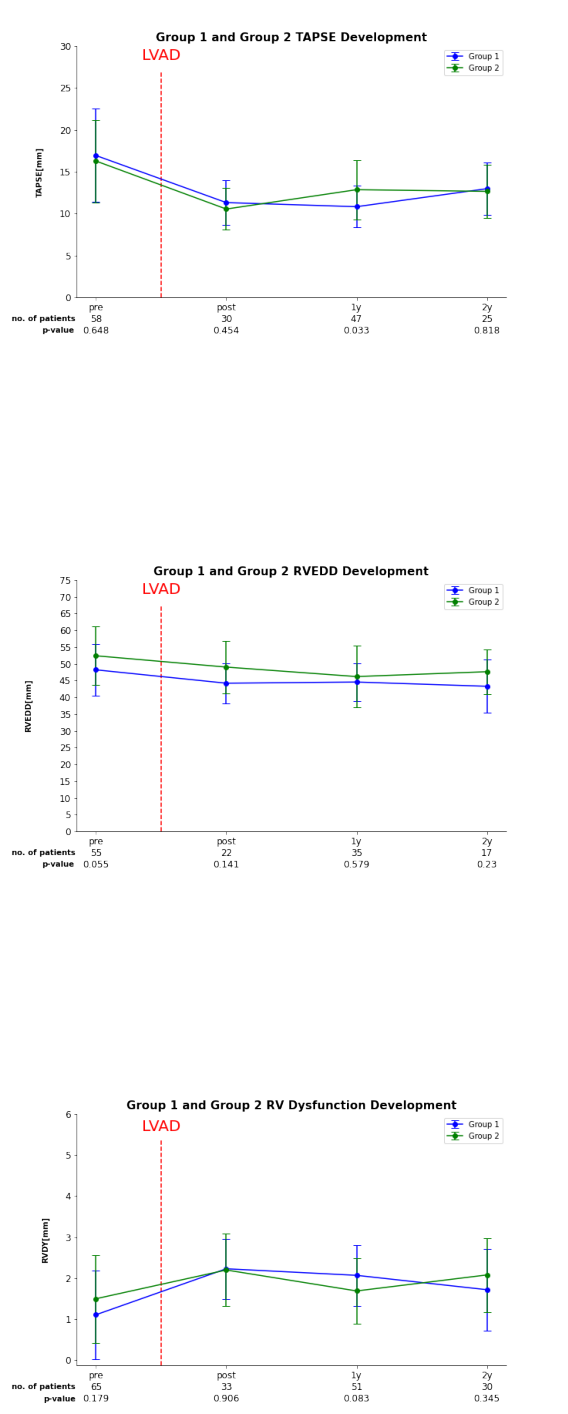

In [81]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# List of PNG files
png_files = ['tapsecombo.png', 'rveddcombo.png', 'rvdycombo.png']

# Create a figure with a 3x1 grid layout
fig, axs = plt.subplots(3, 1, figsize=(8, 24))

# Loop through the PNG files and add them to the subplots
for i, png_file in enumerate(png_files):
    img = mpimg.imread(png_file)
    axs[i].imshow(img)
    axs[i].axis('off')  # Hide axis labels

plt.tight_layout()
# save as a combo file
plt.savefig('combined_line_plots.pdf')
plt.show()


In [200]:
[c for c in group1_df.columns if "average" in c.lower()]

['Average Postop TAPSE',
 'Average Postop RVEDD',
 'Average Postop RV Dysfunction']